In [1]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('D:\deepfake_detection_model\selected_video.csv')

df

,label,file_name,path
0,FAKE,qudhlvaxtc.mp4,D:\OneDrive - Asia Pacific University\Degree Y...
1,FAKE,jzxzzmcplq.mp4,D:\OneDrive - Asia Pacific University\Degree Y...
2,FAKE,pydbvfkslp.mp4,D:\OneDrive - Asia Pacific University\Degree Y...
3,FAKE,vytklfqusv.mp4,D:\OneDrive - Asia Pacific University\Degree Y...
4,FAKE,dbzpqxlahq.mp4,D:\OneDrive - Asia Pacific University\Degree Y...
...,...,...,...
5019,REAL,znlzegqkbp.mp4,D:\OneDrive - Asia Pacific University\Degree Y...
5020,REAL,rzytdiivhu.mp4,D:\OneDrive - Asia Pacific University\Degree Y...
5021,REAL,icffpvvtnu.mp4,D:\OneDrive - Asia Pacific University\Degree Y...
5022,REAL,ucidfsqdkw.mp4,D:\OneDrive - Asia Pacific University\Degree Y...


In [3]:
len(df['file_name'].unique())

5024

Text(0.5, 1.0, 'Distribution of Label')

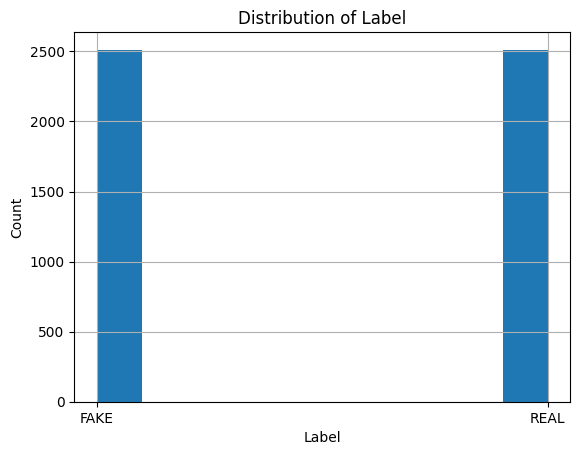

In [42]:
df['label'].hist()

plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Label')

In [43]:
import os
paths = df['path'].tolist()
file_name = os.path.basename(paths[0])
print("File Name:", file_name.replace('.zip', ''))

File Name: dfdc_train_part_09


In [44]:
import json
import os


result = []
for _, row in df.iterrows():
    # Формування ключа з шляху
    s = '/'
    file_path = os.path.join(row['label'], row['label'], os.path.basename(row['path']).replace('.zip', ''), row['file_name'])
    result.append((file_path, row['label']))

result

[('FAKE\\FAKE\\dfdc_train_part_09\\qudhlvaxtc.mp4', 'FAKE'),
 ('FAKE\\FAKE\\dfdc_train_part_04\\jzxzzmcplq.mp4', 'FAKE'),
 ('FAKE\\FAKE\\dfdc_train_part_01\\pydbvfkslp.mp4', 'FAKE'),
 ('FAKE\\FAKE\\dfdc_train_part_08\\vytklfqusv.mp4', 'FAKE'),
 ('FAKE\\FAKE\\dfdc_train_part_01\\dbzpqxlahq.mp4', 'FAKE'),
 ('FAKE\\FAKE\\dfdc_train_part_07\\uqkdiusxtz.mp4', 'FAKE'),
 ('FAKE\\FAKE\\dfdc_train_part_01\\snphlfsrmr.mp4', 'FAKE'),
 ('FAKE\\FAKE\\dfdc_train_part_04\\ohofmyydou.mp4', 'FAKE'),
 ('FAKE\\FAKE\\dfdc_train_part_06\\mhodpmscfi.mp4', 'FAKE'),
 ('FAKE\\FAKE\\dfdc_train_part_04\\hfhgtkuaxr.mp4', 'FAKE'),
 ('FAKE\\FAKE\\dfdc_train_part_09\\njgymtktgd.mp4', 'FAKE'),
 ('FAKE\\FAKE\\dfdc_train_part_01\\sclvdumbkh.mp4', 'FAKE'),
 ('FAKE\\FAKE\\dfdc_train_part_01\\lnfcazoshs.mp4', 'FAKE'),
 ('FAKE\\FAKE\\dfdc_train_part_04\\pwduwistqx.mp4', 'FAKE'),
 ('FAKE\\FAKE\\dfdc_train_part_07\\dkrknynayu.mp4', 'FAKE'),
 ('FAKE\\FAKE\\dfdc_train_part_01\\pgeibxkxri.mp4', 'FAKE'),
 ('FAKE\\FAKE\\dfdc_trai

In [45]:
import json
import pandas as pd


with open('D:\\deepfake_detection_model\\deepfake-detection-challenge\\train_sample_videos\\metadata.json', 'r') as f:
    data = json.load(f)

df = pd.DataFrame.from_dict(data, orient='index').reset_index()

df.rename(columns={'index': 'video_id'}, inplace=True)

df

,video_id,label,split,original
0,aagfhgtpmv.mp4,FAKE,train,vudstovrck.mp4
1,aapnvogymq.mp4,FAKE,train,jdubbvfswz.mp4
2,abarnvbtwb.mp4,REAL,train,None
3,abofeumbvv.mp4,FAKE,train,atvmxvwyns.mp4
4,abqwwspghj.mp4,FAKE,train,qzimuostzz.mp4
...,...,...,...,...
395,etejaapnxh.mp4,FAKE,train,wtreibcmgm.mp4
396,etmcruaihe.mp4,FAKE,train,afoovlsmtx.mp4
397,etohcvnzbj.mp4,FAKE,train,bdnaqemxmr.mp4
398,eudeqjhdfd.mp4,REAL,train,None


In [46]:
import json
import pandas as pd
import os

df = pd.read_csv(os.path.join('D:\\deepfake_detection_model\\deepfake-detection-challenge\\', 'sample_submission.csv'))

df

,filename,label
0,aassnaulhq.mp4,0
1,aayfryxljh.mp4,0
2,acazlolrpz.mp4,0
3,adohdulfwb.mp4,0
4,ahjnxtiamx.mp4,0
...,...,...
395,ztyvglkcsf.mp4,0
396,zuwwbbusgl.mp4,0
397,zxacihctqp.mp4,0
398,zyufpqvpyu.mp4,0


In [47]:
import json
import os


result = {}
for _, row in df.iterrows():
    # Формування ключа з шляху
    s = '/'
    file_path = row['filename']
    if row['label'] == 0:
        label = "REAL"
    else:
        label = "FAKE"

    
    result[file_path] = {
        'label': label
    }


with open('test.json', 'w') as json_file:
    json.dump(result, json_file, indent=4)

In [48]:
import os


with open(os.path.join('D:\\deepfake_detection_model\\deepfake-detection-challenge\\train_sample_videos\\', 'metadata.json')) as f:
    videos = json.load(f)
    videos = [(os.path.join('D:\\deepfake_detection_model\\deepfake-detection-challenge\\train_sample_videos\\', video), metadata) for (video, metadata) in videos.items()]

print(len(videos))

400


Text(0.5, 1.0, 'Distribution of Label')

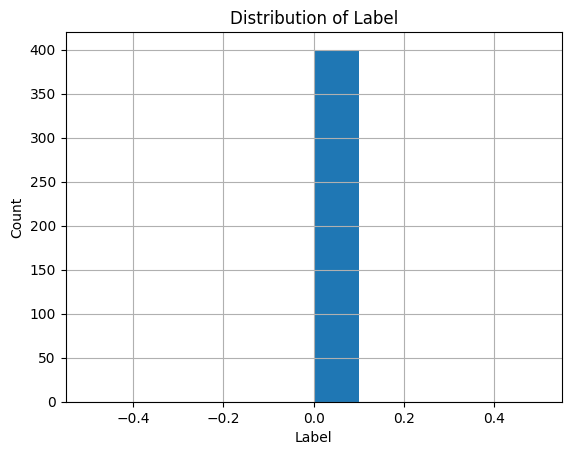

In [49]:
df['label'].hist()

plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Label')

In [50]:
df.groupby('label').size()

label
0    400
dtype: int64

In [51]:
df.groupby('file_name').size()

KeyError: 'file_name'

In [ ]:
data = pd.read_csv('D:\deepfake_detection_model\metadata\metadata', low_memory=False)

In [ ]:
(data['pxl.hash'] == data['pxl.hash.orig']).value_counts()

False    119146
dtype: int64

In [ ]:
data

,filename,video.@index,video.@codec_time_base,video.@width,video.@height,video.@sample_aspect_ratio,video.@display_aspect_ratio,video.@level,video.@r_frame_rate,video.@time_base,...,original,folder,wav.hash.cnt,original.cnt,md5,md5.orig,wav.hash,wav.hash.orig,pxl.hash,pxl.hash.orig
0,hrundztjfb.mp4,0,2500/150301,1920,1080,1:1,16:9,40,150301/5000,1/150301,...,vvrlglaepq.mp4,dfdc_train_part_12,3.0,2.0,7b1db59bdb78179aa3ed78a4270ed063,d98cd8af0ba7ce2a51acefb2c0502b71,6877743394119074431s,6877743394119074431s,4312499372455908935s,16061268809469102567s
1,uyfnfvsxez.mp4,0,50/2997,1920,1080,NAN,NAN,40,2997/100,1/11988,...,NAN,dfdc_train_part_12,2.0,NaN,62c47bd354599ce0fad65d28ef4b78b9,NaN,-4734951634879773329s,NaN,17835547769154037975s,NaN
2,yknlciphae.mp4,0,50/2997,1920,1080,1:1,16:9,40,2997/100,1/11988,...,ahesnzswur.mp4,dfdc_train_part_12,6.0,5.0,a0e4d1f8bf2636def22dc2f2b21187dd,3bb70580dbf21c4719f17c4e4617c398,-5599986156292069640s,-5599986156292069640s,16356267960363338360s,14219253130038039922s
3,zfyczzssiz.mp4,0,50/2997,1920,1080,1:1,16:9,40,2997/100,1/11988,...,jdvzqjihud.mp4,dfdc_train_part_12,7.0,6.0,d641ebd07badeb89c0d389019d9f7e72,c77170df2cc8b40ef1d39b6d79105321,-1564427678199738496s,-1564427678199738496s,12983824148373679782s,6108291220829004959s
4,kggbciadwj.mp4,0,125/7501,1080,1920,1:1,9:16,40,7501/250,1/15002,...,NAN,dfdc_train_part_12,9.0,NaN,7de3ddacab0c9109e2a985d2c03244ea,NaN,-1251615899500302547s,NaN,970391495631676767s,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119141,ecqiuhmijo.mp4,0,625/37599,1920,1080,1:1,16:9,40,37599/1250,1/37599,...,qgalcgvqoz.mp4,dfdc_train_part_8,13.0,12.0,cec335ee37f9cfc703754ff8cffe08d0,48b61cbb5e78bcfb8d2a0f2114442b35,8884601750571192987s,8884601750571192987s,1707335066847917120s,12896116552346240566s
119142,bfifbfziqw.mp4,0,5000/298729,1920,1080,1:1,16:9,40,298729/10000,1/298729,...,sbfqskzcxw.mp4,dfdc_train_part_8,18.0,17.0,78a424879ac99067468ad067499d5614,a62cba493cf1d13d780e3b3f90934bbb,1261302301170646961s,1261302301170646961s,3973207955448026452s,5361291702580585497s
119143,hwzqeodegs.mp4,0,50/2997,1920,1080,NAN,NAN,40,2997/100,1/11988,...,NAN,dfdc_train_part_8,2.0,NaN,9d2099f4415aa24a0b1af0260dfd7008,NaN,-6344801452981133525s,NaN,5143388631801766485s,NaN
119144,cbukvshrzm.mp4,0,5000/298731,1920,1080,1:1,16:9,40,298731/10000,1/298731,...,gbbkbmzpfl.mp4,dfdc_train_part_8,9.0,13.0,f3ac2c37197486057f4e056040b38931,fa18f60fac081166eb75b203ea44e0ab,1134449075896085660s,-2121756635260252783s,12898255773587192080s,14915045442117171048s


In [ ]:
data[data['filename']=='znlzegqkbp.mp4']['label']

19775    REAL
Name: label, dtype: object

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('D:\deepfake_detection_model\deepfake-detection-challenge\sample_submission.csv')

df[df['filename'] == 'aassnaulhq.mp4']['label'].to_list()[0]

0

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


df = pd.read_csv('D:\deepfake_detection_model\FakeAVCeleb\meta_data.csv')

# Вибираємо лише категорії A та C
df_filtered = df[df['category'].isin(['A', 'C'])]

# Фільтруємо до 500 унікальних джерел у категорії "C"
df_category_c = df_filtered[df_filtered['category'] == 'C']
df_category_c_unique = df_category_c.drop_duplicates(subset=['source']).head(500)

# Переконуємось, що в категорії "C" дійсно 500 унікальних джерел
if df_category_c_unique['source'].nunique() < 500:
    raise ValueError("Недостатньо унікальних джерел у категорії 'C'.")

# Фільтруємо до 500 записів у категорії "A"
df_category_a = df_filtered[df_filtered['category'] == 'A'].head(500)

# Об’єднуємо обидві вибірки
df_sampled = pd.concat([df_category_a, df_category_c_unique])

# Застосовуємо групування та вибираємо до 50 унікальних значень у кожній комбінації
df_unique = df_sampled.groupby(['category', 'race', 'gender']).apply(lambda x: x.drop_duplicates(subset=['source', 'path']).head(50))
df_unique = df_unique.reset_index(drop=True)

# Створюємо стовпець для стратефікації
df_unique['stratify_col'] = df_unique['category'].astype(str) + '_' + df_unique['race'] + '_' + df_unique['gender']

# Розділяємо на тренувальний і тестовий набори, використовуючи стратефікацію
train_df, test_df = train_test_split(
    df_unique,
    test_size=0.2,
    random_state=42,
    stratify=df_unique['stratify_col']
)

# Видаляємо допоміжний стовпець для стратефікації
train_df = train_df.drop(columns=['stratify_col'])
test_df = test_df.drop(columns=['stratify_col'])

# Зберігаємо результати у файли CSV
train_df.to_csv("train_dataset.csv", index=False)
test_df.to_csv("test_dataset.csv", index=False)

In [ ]:
df_unique

,source,target1,target2,method,category,type,race,gender,path,Unnamed: 9,stratify_col
0,id00076,-,-,real,A,RealVideo-RealAudio,African,men,00109.mp4,FakeAVCeleb/RealVideo-RealAudio/African/men/id...,A_African_men
1,id00166,-,-,real,A,RealVideo-RealAudio,African,men,00010.mp4,FakeAVCeleb/RealVideo-RealAudio/African/men/id...,A_African_men
2,id00173,-,-,real,A,RealVideo-RealAudio,African,men,00118.mp4,FakeAVCeleb/RealVideo-RealAudio/African/men/id...,A_African_men
3,id00366,-,-,real,A,RealVideo-RealAudio,African,men,00118.mp4,FakeAVCeleb/RealVideo-RealAudio/African/men/id...,A_African_men
4,id00391,-,-,real,A,RealVideo-RealAudio,African,men,00052.mp4,FakeAVCeleb/RealVideo-RealAudio/African/men/id...,A_African_men
...,...,...,...,...,...,...,...,...,...,...,...
995,id03716,0.mp4,-,faceswap,C,FakeVideo-RealAudio,Caucasian (European),women,00040_0.mp4,FakeAVCeleb/FakeVideo-RealAudio/Caucasian (Eur...,C_Caucasian (European)_women
996,id03816,id03941,-,faceswap,C,FakeVideo-RealAudio,Caucasian (European),women,00093_id03941_SsYtP8Ze88Q_faceswap.mp4,FakeAVCeleb/FakeVideo-RealAudio/Caucasian (Eur...,C_Caucasian (European)_women
997,id03844,0.mp4,-,faceswap,C,FakeVideo-RealAudio,Caucasian (European),women,00028_0.mp4,FakeAVCeleb/FakeVideo-RealAudio/Caucasian (Eur...,C_Caucasian (European)_women
998,id03858,0.mp4,-,faceswap,C,FakeVideo-RealAudio,Caucasian (European),women,00092_0.mp4,FakeAVCeleb/FakeVideo-RealAudio/Caucasian (Eur...,C_Caucasian (European)_women


In [ ]:
len(df_unique['source'].unique())

500

In [ ]:
curr_df = df_unique[df_unique['category'] == 'C']
len(curr_df['source'].unique())

500

In [ ]:
curr_df = df_unique[df_unique['method'] == 'real']
curr_df[curr_df['path'] == '00118.mp4']


,source,target1,target2,method,category,type,race,gender,path,Unnamed: 9,stratify_col
2,id00173,-,-,real,A,RealVideo-RealAudio,African,men,00118.mp4,FakeAVCeleb/RealVideo-RealAudio/African/men/id...,A_African_men
3,id00366,-,-,real,A,RealVideo-RealAudio,African,men,00118.mp4,FakeAVCeleb/RealVideo-RealAudio/African/men/id...,A_African_men
209,id00732,-,-,real,A,RealVideo-RealAudio,Asian (South),men,00118.mp4,FakeAVCeleb/RealVideo-RealAudio/Asian (South)/...,A_Asian (South)_men
213,id00816,-,-,real,A,RealVideo-RealAudio,Asian (South),men,00118.mp4,FakeAVCeleb/RealVideo-RealAudio/Asian (South)/...,A_Asian (South)_men
222,id04554,-,-,real,A,RealVideo-RealAudio,Asian (South),men,00118.mp4,FakeAVCeleb/RealVideo-RealAudio/Asian (South)/...,A_Asian (South)_men
227,id04601,-,-,real,A,RealVideo-RealAudio,Asian (South),men,00118.mp4,FakeAVCeleb/RealVideo-RealAudio/Asian (South)/...,A_Asian (South)_men
264,id03815,-,-,real,A,RealVideo-RealAudio,Asian (South),women,00118.mp4,FakeAVCeleb/RealVideo-RealAudio/Asian (South)/...,A_Asian (South)_women
288,id06439,-,-,real,A,RealVideo-RealAudio,Asian (South),women,00118.mp4,FakeAVCeleb/RealVideo-RealAudio/Asian (South)/...,A_Asian (South)_women
304,id00049,-,-,real,A,RealVideo-RealAudio,Caucasian (American),men,00118.mp4,FakeAVCeleb/RealVideo-RealAudio/Caucasian (Ame...,A_Caucasian (American)_men
445,id01154,-,-,real,A,RealVideo-RealAudio,Caucasian (European),men,00118.mp4,FakeAVCeleb/RealVideo-RealAudio/Caucasian (Eur...,A_Caucasian (European)_men


In [ ]:
df_unique['method'].unique()

array(['real', 'faceswap', 'fsgan'], dtype=object)

In [ ]:
print("\nРозподіл за race та gender для кожного класу:")
for category in train_df['category'].unique():
    print(f"\nCategory {category}:")
    print(train_df[train_df['category'] == category][['race', 'gender']].value_counts())



Розподіл за race та gender для кожного класу:

Category C:
race                  gender
African               men       40
                      women     40
Asian (East)          men       40
                      women     40
Asian (South)         men       40
                      women     40
Caucasian (American)  men       40
                      women     40
Caucasian (European)  men       40
                      women     40
dtype: int64

Category A:
race                  gender
African               men       40
                      women     40
Asian (East)          men       40
                      women     40
Asian (South)         men       40
                      women     40
Caucasian (American)  men       40
                      women     40
Caucasian (European)  men       40
                      women     40
dtype: int64


In [ ]:
df_unique.to_csv("balanced_dataset.csv", index=False)

In [ ]:
from sklearn.utils import class_weight
import torch
import numpy as np

# Об'єднання класів
df['category'] = df['category'].replace({'A': 'AB', 'B': 'AB', 'C': 'CD', 'D': 'CD'})

# Отримання міток класів
labels = df['category'].values

# Обчислення ваг класів
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(labels), y=labels)

# Перетворення ваг класів у тензор
class_weights_tensor = torch.tensor(class_weights, dtype=torch.float)

print(class_weights_tensor)

tensor([10.7830,  0.5243])


In [ ]:
import json
import os


result = {}
for _, row in df.iterrows():
    # Формування ключа з шляху
    s = '/'
    file_path = row['Unnamed: 9'] + s + row['path']
    file_path = file_path.replace('/', '\\')   

    label = row['category']

    
    result[file_path] = {
        'label': label
    }


with open('output_balenced.json', 'w') as json_file:
    json.dump(result, json_file, indent=4)

In [ ]:
df[df['category'] == 'B']

,source,target1,target2,method,category,type,race,gender,path,Unnamed: 9
500,id00076,fake.mp4,-,rtvc,B,RealVideo-FakeAudio,African,men,00109_fake.mp4,FakeAVCeleb/RealVideo-FakeAudio/African/men/id...
501,id00166,fake.mp4,-,rtvc,B,RealVideo-FakeAudio,African,men,00010_fake.mp4,FakeAVCeleb/RealVideo-FakeAudio/African/men/id...
502,id00173,fake.mp4,-,rtvc,B,RealVideo-FakeAudio,African,men,00118_fake.mp4,FakeAVCeleb/RealVideo-FakeAudio/African/men/id...
503,id00366,fake.mp4,-,rtvc,B,RealVideo-FakeAudio,African,men,00118_fake.mp4,FakeAVCeleb/RealVideo-FakeAudio/African/men/id...
504,id00391,fake.mp4,-,rtvc,B,RealVideo-FakeAudio,African,men,00052_fake.mp4,FakeAVCeleb/RealVideo-FakeAudio/African/men/id...
...,...,...,...,...,...,...,...,...,...,...
995,id07136,fake.mp4,-,rtvc,B,RealVideo-FakeAudio,Asian (South),women,00052_fake.mp4,FakeAVCeleb/RealVideo-FakeAudio/Asian (South)/...
996,id07236,fake.mp4,-,rtvc,B,RealVideo-FakeAudio,Asian (South),women,00143_fake.mp4,FakeAVCeleb/RealVideo-FakeAudio/Asian (South)/...
997,id07377,fake.mp4,-,rtvc,B,RealVideo-FakeAudio,Asian (South),women,00025_fake.mp4,FakeAVCeleb/RealVideo-FakeAudio/Asian (South)/...
998,id07686,fake.mp4,-,rtvc,B,RealVideo-FakeAudio,Asian (South),women,00254_fake.mp4,FakeAVCeleb/RealVideo-FakeAudio/Asian (South)/...


In [ ]:
df[df['category'] == 'C']

,source,target1,target2,method,category,type,race,gender,path,Unnamed: 9
1000,id00076,1.mp4,-,faceswap,C,FakeVideo-RealAudio,African,men,00109_1.mp4,FakeAVCeleb/FakeVideo-RealAudio/African/men/id...
1001,id00076,10.mp4,-,faceswap,C,FakeVideo-RealAudio,African,men,00109_10.mp4,FakeAVCeleb/FakeVideo-RealAudio/African/men/id...
1002,id00076,11.mp4,-,faceswap,C,FakeVideo-RealAudio,African,men,00109_11.mp4,FakeAVCeleb/FakeVideo-RealAudio/African/men/id...
1003,id00076,12.mp4,-,faceswap,C,FakeVideo-RealAudio,African,men,00109_12.mp4,FakeAVCeleb/FakeVideo-RealAudio/African/men/id...
1004,id00076,2.mp4,-,faceswap,C,FakeVideo-RealAudio,African,men,00109_2.mp4,FakeAVCeleb/FakeVideo-RealAudio/African/men/id...
...,...,...,...,...,...,...,...,...,...,...
16974,id07689,id05434,-,wav2lip,C,FakeVideo-RealAudio,Asian (South),women,00028_id05434_wavtolip.mp4,FakeAVCeleb/FakeVideo-RealAudio/Asian (South)/...
16975,id07689,id06254,-,wav2lip,C,FakeVideo-RealAudio,Asian (South),women,00028_id06254_wavtolip.mp4,FakeAVCeleb/FakeVideo-RealAudio/Asian (South)/...
16976,id07689,id06428,-,wav2lip,C,FakeVideo-RealAudio,Asian (South),women,00028_id06428_wavtolip.mp4,FakeAVCeleb/FakeVideo-RealAudio/Asian (South)/...
16977,id07689,id06438,-,wav2lip,C,FakeVideo-RealAudio,Asian (South),women,00028_id06438_wavtolip.mp4,FakeAVCeleb/FakeVideo-RealAudio/Asian (South)/...


Text(0.5, 1.0, 'Distribution of Label')

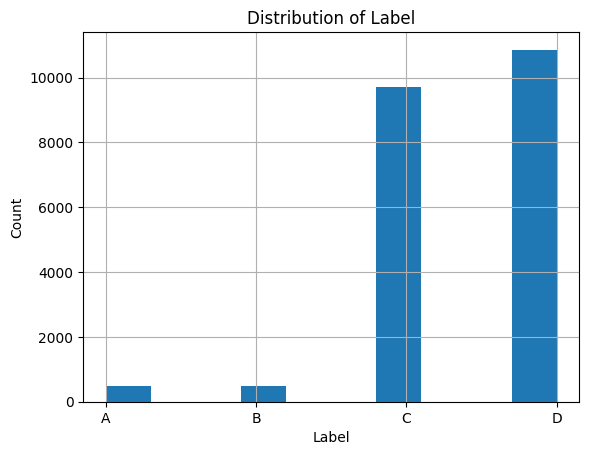

In [ ]:
df['category'].hist()

plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Label')

In [ ]:
import os
import json

videos = []
folders = [os.path.join("D:\\", "deepfake_detection_model", "deepfake-detection-challenge", "train_sample_videos"), os.path.join("D:\\", "deepfake_detection_model", "deepfake-detection-challenge", "test_videos")]
for i in range(len(folders)):
    if i == 0:
        with open(os.path.join("D:\\", "deepfake_detection_model", "deepfake-detection-challenge", "train_sample_videos", "metadata.json")) as f:
            videos_curr = json.load(f)
            videos_curr = [((os.path.join(folders[i], video)), metadata['label']) for (video, metadata) in videos_curr.items()]
            videos += videos_curr
    else:
        with open(os.path.join("test.json")) as f:
            videos_curr = json.load(f)
            videos_curr = [((os.path.join(folders[i], video)), metadata['label']) for (video, metadata) in videos_curr.items()]
            videos += videos_curr[:246]

In [ ]:
videos

[('D:\\deepfake_detection_model\\deepfake-detection-challenge\\train_sample_videos\\aagfhgtpmv.mp4',
  'FAKE'),
 ('D:\\deepfake_detection_model\\deepfake-detection-challenge\\train_sample_videos\\aapnvogymq.mp4',
  'FAKE'),
 ('D:\\deepfake_detection_model\\deepfake-detection-challenge\\train_sample_videos\\abarnvbtwb.mp4',
  'REAL'),
 ('D:\\deepfake_detection_model\\deepfake-detection-challenge\\train_sample_videos\\abofeumbvv.mp4',
  'FAKE'),
 ('D:\\deepfake_detection_model\\deepfake-detection-challenge\\train_sample_videos\\abqwwspghj.mp4',
  'FAKE'),
 ('D:\\deepfake_detection_model\\deepfake-detection-challenge\\train_sample_videos\\acifjvzvpm.mp4',
  'FAKE'),
 ('D:\\deepfake_detection_model\\deepfake-detection-challenge\\train_sample_videos\\acqfdwsrhi.mp4',
  'FAKE'),
 ('D:\\deepfake_detection_model\\deepfake-detection-challenge\\train_sample_videos\\acxnxvbsxk.mp4',
  'FAKE'),
 ('D:\\deepfake_detection_model\\deepfake-detection-challenge\\train_sample_videos\\acxwigylke.mp4',
  '

In [ ]:
import pandas as pd

df = pd.DataFrame(videos, columns=['video_path', 'label'])

# Перевірка отриманого DataFrame
len(df['video_path'].unique())

646

In [ ]:
df

,video_path,label
0,D:\deepfake_detection_model\deepfake-detection...,FAKE
1,D:\deepfake_detection_model\deepfake-detection...,FAKE
2,D:\deepfake_detection_model\deepfake-detection...,REAL
3,D:\deepfake_detection_model\deepfake-detection...,FAKE
4,D:\deepfake_detection_model\deepfake-detection...,FAKE
...,...,...
641,D:\deepfake_detection_model\deepfake-detection...,REAL
642,D:\deepfake_detection_model\deepfake-detection...,REAL
643,D:\deepfake_detection_model\deepfake-detection...,REAL
644,D:\deepfake_detection_model\deepfake-detection...,REAL


In [ ]:
train_data, test_data = train_test_split(
    df,
    test_size=0.2,  # Наприклад, 20% для тестового набору
    stratify=df['label'],  # Зберігає співвідношення класів
    random_state=42  # Для відтворюваності
)

# Перевірка кількості кожного класу у тренувальному та тестовому наборах
print("Кількість у тренувальному наборі:")
print(train_data['label'].value_counts())
print("\nКількість у тестовому наборі:")
print(test_data['label'].value_counts())

Кількість у тренувальному наборі:
FAKE    258
REAL    258
Name: label, dtype: int64

Кількість у тестовому наборі:
FAKE    65
REAL    65
Name: label, dtype: int64


In [ ]:
df.to_json("videos.json", orient="records", lines=True)

In [ ]:
import cv2
import itertools
import json
import numpy as np
import pandas as pd
import random
from torch.nn import functional as F
import os.path
import time
import torch
from torch import nn
from torch.nn import functional
import glob
import datetime
import subprocess
from facenet_pytorch import MTCNN
import shutil

#D:\\deepfake_detection_model\\
class FaceDeepfakeDataset(torch.utils.data.Dataset):
    def __init__(self, folders, n_frames=None, n_audio_reads=50027, train=True, device=None, cache_folder=None):
        """n_audio_reads controls the length of the audio sequence: 5000 readings/sec."""
        self.n_frames = n_frames
        self.n_audio_reads = n_audio_reads
        self.videos = []
        self.train = train
        self.device = device if device is not None else torch.device("cpu")
        self.cache_folder = cache_folder
        self.detector = MTCNN(device='cpu', post_process=False)

        for i in range(len(folders)):
            if train:
                if i == 0:
                    with open('D:\deepfake_detection_model\output.json') as f:
                        videos = json.load(f)
                        videos = [(os.path.join(folders[i], video), metadata) for (video, metadata) in videos.items()]
                        self.videos += videos
                else:
                    with open(os.path.join("test.json")) as f:
                        videos = json.load(f)
                        videos = [(os.path.join(folders[i], video), metadata) for (video, metadata) in videos.items()]
                        self.videos += videos
            else:
                self.videos += glob.glob(folders[i] + "/*.mp4")

    def __process_frame(self, frame):
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        face = self.detector(frame)
        if face is None:
            face = torch.zeros((3, 160, 160))
        face = face / 255  # Normalize to [0, 1]
        return face

    def __getitem__(self, n):
        if self.train:
            video, metadata = self.videos[n]
        else:
            video = self.videos[n]

        # Якщо це символічне посилання на відео, розв'язати його
        if os.path.islink(video):
            video = os.readlink(video)

        cap = cv2.VideoCapture(video)

        frames = []
        for _ in range(self.n_frames):
            ret, frame = cap.read()
            if not ret:
                break
            # Перетворюємо кадр на формат, що підходить для PyTorch
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # Перетворюємо у RGB
            frame = torch.tensor(frame).permute(2, 0, 1).float() / 255.0
            frames.append(frame)
        cap.release()

        # Стекуємо кадри в один тензор
        frames = torch.stack(frames).to(self.device)

        # Повертаємо дані
        if self.train:
            label = 1.0
            if metadata['label'] == 'C' or metadata['label'] == 'D':
                label = 0.0
            return frames, torch.FloatTensor([label]).to(self.device)
        else:
            return frames
    def __len__(self):
        return len(self.videos)


d:\deepfake_detection_model\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Label: tensor([1.], device='cuda:0')


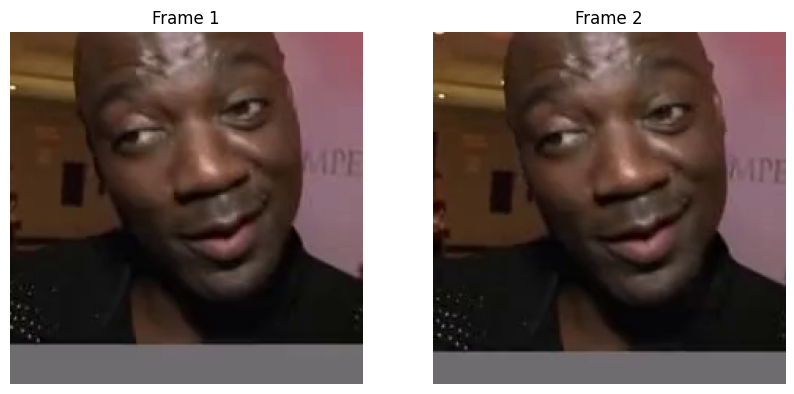

In [ ]:
def test_face_dataset():
    TRAIN_FOLDERS = [os.path.join("D:\\", "deepfake_detection_model\\")]
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    dataset = FaceDeepfakeDataset(TRAIN_FOLDERS, n_frames=30, train=True, device=device, cache_folder=None)
    
    # Одержуємо перший батч
    for i, batch in enumerate(dataset):
        frames, label = batch
        print(f"Label: {label}")
        
        # Перевіряємо розмір кадрів
        if frames.size() != torch.Size([30, 3, 224, 224]):
            print(f"Unexpected frame size: {frames.size()}")
        
        # Візуалізуємо перші два кадри
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))
        
        for j in range(2):
            ax = axes[j]
            frame = frames[j].cpu().permute(1, 2, 0).numpy()  # Перетворюємо з CHW в HWC і конвертуємо в NumPy
            ax.imshow(frame)  # Виводимо зображення
            ax.set_title(f"Frame {j+1}")
            ax.axis('off')
        
        plt.show()
        break  # Призупиняємо після першого батчу

test_face_dataset()

In [ ]:
class FaceDeepfakeDatasetTest(torch.utils.data.Dataset):
    def __init__(self, folders, n_frames=None, n_audio_reads=50027, train=True, device=None, cache_folder=None):
        """n_audio_reads controls the length of the audio sequence: 5000 readings/sec."""
        self.n_frames = n_frames
        self.n_audio_reads = n_audio_reads
        self.videos = []
        self.train = train
        self.device = device if device is not None else torch.device("cpu")
        self.cache_folder = cache_folder
        self.detector = MTCNN(device='cpu', post_process=False)
        for i in range(len(folders)):
            if train:
                #print(folders[i])
                for item in os.listdir(folders[i]):
                    item_path = os.path.join(folders[i], item)
                    if str(os.path.basename(item_path)) == 'fake':
                        for curr in os.listdir(item_path):
                            if os.path.isfile(os.path.join(item_path, curr)):
                                metadata = {}
                                metadata['label']='fake'
                                self.videos += [(os.path.join(item_path, curr), metadata)]
                    else:
                        for item_file in os.listdir(item_path):
                            if os.path.isfile(os.path.join(item_path, item_file)):
                                metadata = {}
                                metadata['label']='real'
                                self.videos += [(os.path.join(item_path, item_file), metadata)]
            else:
                self.videos += glob.glob(folders[i] + "/*.mp4")

    def __process_frame(self, frame):
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        boxes, _ = self.detector.detect(frame, landmarks=False)  # Отримуємо координати обличчя
        
        if boxes is None:
            # Повертаємо порожній кадр, якщо обличчя не знайдено
            face = torch.zeros((3, 224, 224))
        else:
            # Беремо перше обличчя (якщо знайдено кілька)
            box = boxes[0]
            
            # Розширюємо рамку на 30%
            width = box[2] - box[0]
            height = box[3] - box[1]
            expand_x = width * 0.3 / 2
            expand_y = height * 0.3 / 2
            x1 = max(int(box[0] - expand_x), 0)
            y1 = max(int(box[1] - expand_y), 0)
            x2 = min(int(box[2] + expand_x), frame.shape[1])
            y2 = min(int(box[3] + expand_y), frame.shape[0])
            
            # Обрізаємо зображення за новими координатами
            face = frame[y1:y2, x1:x2]
            face = cv2.resize(face, (224, 224))  # Масштабуємо до 300x300
            
            # Перетворюємо на тензор і нормалізуємо
            face = torch.from_numpy(face).permute(2, 0, 1).float() / 255.0
        
        return face

    def __getitem__(self, n):
        if self.train:
            video, metadata = self.videos[n]
        else:
            video = self.videos[n]

        # Processing video frames
        if os.path.islink(video):
            video = os.readlink(video)

        cap = cv2.VideoCapture(video)

        frames = []
        for _ in range(self.n_frames):
            ret, frame = cap.read()
            if not ret:
                break
            frames.append(self.__process_frame(frame))
        '''total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        step = max(1, total_frames // self.n_frames)

        for i in range(self.n_frames):
            cap.set(cv2.CAP_PROP_POS_FRAMES, i * step)
            ret, frame = cap.read()
            if ret:
                frames.append(self.__process_frame(frame))
            else:
                break'''
        cap.release()
        frames = torch.stack(frames).to(self.device)
        
        # Return data
        if self.train:
            label = 1.0
            if metadata['label'] == 'fake':
                label = 0.0
            return frames, torch.FloatTensor([label]).to(self.device)
        else:
            return frames

    def __len__(self):
        return len(self.videos)

Label: tensor([0.], device='cuda:0')


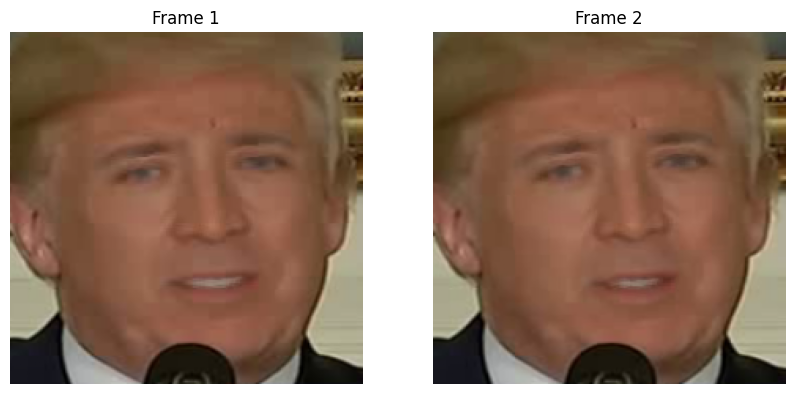

In [ ]:
def test_face_dataset():
    TRAIN_FOLDERS = [os.path.join("D:\\", "deepfake_detection_model", "archive_uadfv", "fake_videos", "train")]
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    dataset = FaceDeepfakeDatasetTest(TRAIN_FOLDERS, n_frames=30, train=True, device=device, cache_folder=None)
    
    # Одержуємо перший батч
    for i, batch in enumerate(dataset):
        frames, label = batch
        print(f"Label: {label}")
        
        # Перевіряємо розмір кадрів
        if frames.size() != torch.Size([30, 3, 224, 224]):
            print(f"Unexpected frame size: {frames.size()}")
        
        # Візуалізуємо перші два кадри
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))
        
        for j in range(2):
            ax = axes[j]
            frame = frames[j].cpu().permute(1, 2, 0).numpy()  # Перетворюємо з CHW в HWC і конвертуємо в NumPy
            ax.imshow(frame)  # Виводимо зображення
            ax.set_title(f"Frame {j+1}")
            ax.axis('off')
        
        plt.show()
        break  # Призупиняємо після першого батчу

test_face_dataset()

In [ ]:
import time
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import random
import datetime
import sys
import pandas as pd
import os
from models import PositionalEncoding
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import torchvision
from models import FaceClassifier
import gc

base_path = 'deepfake-detection-challenge'
        
#train_folder = os.listdir(str(sys.argv[1]))
train_folders = [os.path.join("D:\\", "deepfake_detection_model\\")]


#test_folder = os.listdir(str(sys.argv[2]))
test_folders = [os.path.join("D:\\", "deepfake_detection_model", "archive_uadfv", "fake_videos", "train")]

batch_size = int(1)
num_epochs = int(3)
n_frames = int(10)
lr = float(0.01)

TRAIN_FOLDERS = train_folders
TEST_FOLDERS = test_folders
print(f"all train folders: {train_folders}, {type(train_folders)}")
print(f"all test folders: {test_folders}, {type(test_folders)}")
# AUTOENCODER = 'autoencoder_H10M46S22_04-11-21.pt'

# batch_size = 10
# num_epochs = 1
# epoch_size = 500
# n_frames = 30
milestones = [6,12,18]
gamma = 0.1
n_vid_features = 36*36 # 3600
n_aud_features = 1
n_head = 8
n_layers = 6

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#autoencoder = FaceAutoencoder()
#if len(sys.argv) > 7:
#    print("pretrained autoencoder is loaded")
#    AUTOENCODER = str(sys.argv[7])
#    autoencoder.load_state_dict(torch.load(AUTOENCODER, map_location=device))
#autoencoder.to(device)
#autoencoder.eval()

model = FaceClassifier()
model.load_state_dict(torch.load('D:\\deepfake_detection_model\\deepfake_video_detection\\3_epochs_classifier_10_small.pt', map_location=device))
model = model.to(device)
class_weights = {0: 0.6191950464396285, 1: 10.1230}
weights_tensor = torch.tensor([class_weights[0], 20.1230], dtype=torch.float32).to(device)

# Modify the loss function
criterion = nn.BCEWithLogitsLoss(pos_weight=weights_tensor[1])
optimizer = optim.Adam(model.parameters(), lr=lr)
scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones=milestones, gamma=gamma)

start_time = datetime.datetime.now()
print(f'start time: {str(start_time)}')
print(f'using device: {device}')

'''Splitting into Train and Validation'''
train_dataset = FaceDeepfakeDataset(TRAIN_FOLDERS,  n_frames=n_frames, n_audio_reads=576, device=device, cache_folder="face_encode_cache")
test_dataset = FaceDeepfakeDatasetTest(TEST_FOLDERS, n_frames=n_frames, n_audio_reads=576, device=device)
# dataset_size = len(dataset)
# val_split = .3
# val_size = int(val_split * dataset_size)
# train_size = dataset_size - val_size
# train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True)
print(len(train_loader))
# dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

'''Train_Loop'''
train_losses = []
val_losses = []
best_loss = np.inf
train_accuracies = []
val_accuracies = []
epoch_times = []


for epoch in range(num_epochs):
    epoch_start_time = time.time()
    epoch_t_loss = 0
    epoch_v_loss = 0
    t_count = 0
    t_count_wrong = 0
    train_labels_all = []
    train_preds_all = []

    model.train()
    torch.cuda.empty_cache()
    gc.collect()
    for i, batch in tqdm(enumerate(train_loader)):
        torch.cuda.empty_cache()
        gc.collect()
        # if i * batch_size >= epoch_size:
        #     break
        video_data, labels = batch
        video_data = video_data.to(device)
        #audio_data = audio_data.to(device)
        
        output = model(video_data)
        loss = criterion(output, labels)

        output = torch.sigmoid(output)
        output = output.round()
        
        n_wrong = (labels - output).abs().sum()
        t_count_wrong += n_wrong
        t_count += labels.shape[0]

        epoch_t_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_labels_all.extend(labels.cpu().detach().numpy())
        train_preds_all.extend(output.cpu().detach().numpy())

        #print('.', end='', flush=True)
        torch.cuda.empty_cache()
        gc.collect()

    # Перетворіть на numpy-масиви
    train_labels_all = np.array(train_labels_all).astype(int)
    train_preds_all = np.array(train_preds_all).astype(int)

    # Обчисліть та виведіть матрицю плутанини для тренувального набору
    conf_matrix_train = confusion_matrix(train_labels_all, train_preds_all)
    print(conf_matrix_train)
    # plt.figure(figsize=(8, 6))
    #sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
    #plt.xlabel('Predicted Label')
    #plt.ylabel('True Label')
    #plt.title('Confusion Matrix (Train Set)')
    #plt.show()

    # Виведіть класифікаційний звіт для тренувального набору
    print("Classification Report (Train Set):")
    print(classification_report(train_labels_all, train_preds_all, target_names=['Fake', 'Real']))

    all_labels = []
    all_preds = []

    model.eval()
    with torch.no_grad():
        v_count = 0
        v_count_wrong = 0
        for i, batch in enumerate(val_loader):
            # if i * batch_size >= epoch_size:
        #        break
            video_data, labels = batch
            video_data = video_data.to(device)
            #audio_data = audio_data.to(device)
            # optimizer.zero_grad()
            output = model(video_data)
            loss = criterion(output, labels)

            output = torch.sigmoid(output)
            output = output.round()
            n_wrong = (labels - output).abs().sum()
            v_count_wrong += n_wrong
            v_count += labels.shape[0]

            epoch_v_loss += loss.item()

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(output.cpu().numpy())

            # loss.backward()
            # optimizer.step()
            print('.', end='', flush=True)

    epoch_end_time = time.time()
    epoch_exec_time = epoch_end_time - epoch_start_time
    epoch_times.append(epoch_exec_time)
    train_losses.append(epoch_t_loss/len(train_loader))
    val_losses.append(epoch_t_loss/len(val_loader))

    t_count_right = t_count - t_count_wrong
    v_count_right = v_count - v_count_wrong
    t_accuracy = t_count_right / t_count
    v_accuracy = v_count_right / v_count

    train_accuracies.append(t_accuracy)
    val_accuracies.append(v_accuracy)

    print(f'\nepoch: {epoch}, train loss: {train_losses[-1]}, val loss: {val_losses[-1]}, executed in: {str(epoch_exec_time)}')
    print(f"train total: {t_count}, train correct: {t_count_right}, train incorrect: {t_count_wrong}, train accuracy: {t_accuracy}")
    print(f"valid total: {v_count}, valid correct: {v_count_right}, valid incorrect: {v_count_wrong}, valid accuracy: {v_accuracy}")
    all_labels = np.array(all_labels).astype(int)
    all_preds = np.array(all_preds).astype(int)
    # Обчислення та візуалізація матриці плутанини
    conf_matrix = confusion_matrix(all_labels, all_preds)
    #print(conf_matrix)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

    # Друк звіту про класифікацію
    print("Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=['Fake', 'Real']))

    scheduler.step()
    ### Saving model per best validation loss 
    if best_loss > val_losses[-1]: 
        best_loss = val_losses[-1]
        end_time = datetime.datetime.now()
        torch.save(model.state_dict(), f'classifier_{n_frames}_small.pt')


torch.save(model.state_dict(), f'classifier_{n_frames}_ex.pt')        
end_time = datetime.datetime.now()
print(f"end time: {str(end_time)}")
exec_time = end_time - start_time
print(f"executed in: {str(exec_time)}")
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_cached(0)/1024**3,1), 'GB')

#df = pd.DataFrame()
#df['train_loss'] = train_losses.cpu().numpy()
#df['val_loss'] = val_losses.cpu().numpy()
#df['train_acc'] = train_accuracies.cpu().numpy()
#df['val_acc'] = val_accuracies.cpu().numpy()
#df['epoch_times'] = epoch_times
    
#df.to_csv(f'train_classifier_nframes{n_frames}_bs{batch_size}_lr{lr}.csv', index=False)

all train folders: ['D:\\deepfake_detection_model\\'], <class 'list'>
all test folders: ['D:\\deepfake_detection_model\\archive_uadfv\\fake_videos\\train'], <class 'list'>
start time: 2024-11-06 19:00:19.618338
using device: cuda
21544


0it [00:00, ?it/s]

In [ ]:
torch.save(model.state_dict(), f'3_epochs_classifier_{n_frames}_small.pt')

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import torch


y = df['category'].values  

unique_classes = np.unique(y)
class_weights = compute_class_weight(class_weight='balanced', classes=unique_classes, y=y)

class_weight_dict = {cls: weight for cls, weight in zip(unique_classes, class_weights)}

print(class_weight_dict)
class_weights = torch.tensor(list(class_weight_dict.values()), dtype=torch.float32)
class_weights

{'A': 10.783, 'B': 10.783, 'C': 0.5553095066433207, 'D': 0.49659206042184767}


tensor([10.7830, 10.7830,  0.5553,  0.4966])

In [ ]:
import cv2
import torch

class CapIter:
    def __init__(self, cap, n_frames=None):
        self.cap = cap
        self.n_frames = n_frames
        self.i = 0

    def __iter__(self):
        return self

    def __next__(self):
        if self.n_frames is not None and self.i == self.n_frames:
            raise StopIteration
        ok, frame = self.cap.read()
        if not ok:
            raise StopIteration
        self.i += 1
        return frame

def process_frame(frame):
    if frame is None:
        return torch.zeros((3, 160, 160))  # Повертає порожній тензор, якщо немає кадру
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frame = frame / 255.0
    return frame


path = r"D:\\deepfake_detection_model\\FakeAVCeleb\\FakeVideo-FakeAudio\\Caucasian (American)\\men\\id01168\\00028_id03757_L-M-XbdFLQM_faceswap_id01211_wavtolip.mp4"
cap = cv2.VideoCapture(path)

if not cap.isOpened():
    print("Error: Could not open video.")

it = CapIter(cap, 1)
frames = list(map(process_frame, it))

print(frames)  # Виведе оброблені кадри або порожній список


d:\deepfake_detection_model\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Error: Could not open video.
[]


In [ ]:
import os

video_path = 'D:\deepfake_detection_model\FakeAVCeleb_v1.2\FakeVideo-FakeAudio\Caucasian (American)\men\id01168\00028_id03757_L-M-XbdFLQM_faceswap_id00018_wavtolip.mp4'
if not os.path.isfile(video_path):
    print(f"Error: The video file does not exist at the specified path: {video_path}")


ValueError: stat: embedded null character in path

In [ ]:
import json
import pandas as pd
from sklearn.utils import class_weight
import numpy as np


# Load metadata from JSON file
with open('D:\\deepfake_detection_model\\deepfake-detection-challenge\\train_sample_videos\\metadata.json', 'r') as f:
    data = json.load(f)

# Create a DataFrame from the metadata
df = pd.DataFrame.from_dict(data, orient='index').reset_index()
df.rename(columns={'index': 'video_id'}, inplace=True)

# Display the DataFrame to understand its structure
print(df.head())

# Assuming the DataFrame contains a column 'label' for classification (0 for real, 1 for fake)
# If your actual column name is different, change 'label' to the correct name.
class_counts = df['label'].value_counts()
print("Class counts:\n", class_counts)

classes = np.unique(df['label'].values).tolist()
# Calculate class weights
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=classes,  # Adjust these values based on your actual labels
    y=df['label'].values
)

# Convert class weights to a dictionary
class_weights_dict = {0: class_weights[0], 1: class_weights[1]}
print("Class weights:", class_weights_dict)



         video_id label  split        original
0  aagfhgtpmv.mp4  FAKE  train  vudstovrck.mp4
1  aapnvogymq.mp4  FAKE  train  jdubbvfswz.mp4
2  abarnvbtwb.mp4  REAL  train            None
3  abofeumbvv.mp4  FAKE  train  atvmxvwyns.mp4
4  abqwwspghj.mp4  FAKE  train  qzimuostzz.mp4
Class counts:
 FAKE    323
REAL     77
Name: label, dtype: int64
Class weights: {0: 0.6191950464396285, 1: 2.5974025974025974}


all train folders: ['D:\\deepfake_detection_model\\deepfake-detection-challenge\\train_sample_videos\\metadata.json'], <class 'list'>
all test folders: ['D:\\deepfake_detection_model\\deepfake-detection-challenge\\train_sample_videos\\metadata.json'], <class 'list'>
start time: 2024-11-04 12:25:04.548202
using device: cuda
200


200it [02:04,  1.61it/s]
200it [01:45,  1.90it/s]
d:\deepfake_detection_model\.venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\deepfake_detection_model\.venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\deepfake_detection_model\.venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, ms


Classification Report:
              precision    recall  f1-score   support

           0       0.81      1.00      0.89       323
           1       0.00      0.00      0.00        77

    accuracy                           0.81       400
   macro avg       0.40      0.50      0.45       400
weighted avg       0.65      0.81      0.72       400



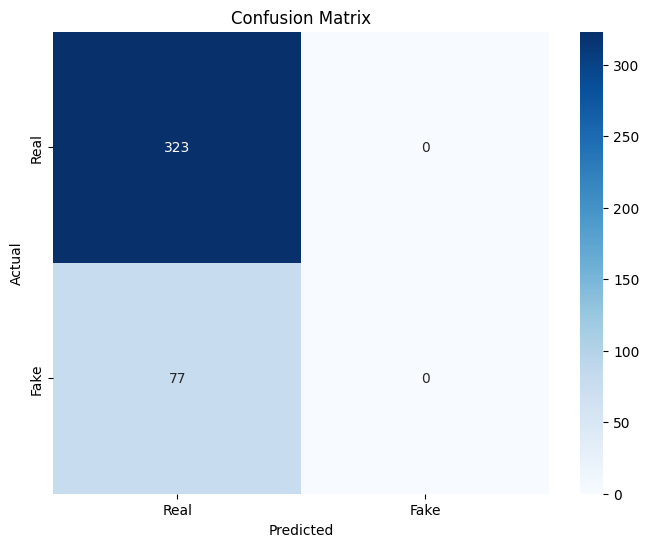

Epoch [1/1], Train Loss: 0.3696, Train Acc: 0.4038, Val Loss: 0.5568, Val Acc: 0.4038, Time: 229.98s


In [2]:
import torch
import torch.nn as nn
import math
from torch.nn import functional as F
import torchvision.models as models


class FaceClassifier(nn.Module):
    def __init__(self, n_linear_hidden=256, lstm_hidden_dim=128, num_lstm_layers=1):
        super(FaceClassifier, self).__init__()

        # Завантаження попередньо натренованої EfficientNet
        self.cnn = models.efficientnet_b7(pretrained=True)
        self.feature_extractor = nn.Sequential(*list(self.cnn.children())[:-1])  # Виключаємо шар класифікації

        # Розмір виходу від feature extractor
        self.feature_output_size = 2560  # EfficientNet B7 дає 2560 ознак

        # LSTM для обробки послідовності ознак кожного кадру
        self.lstm = nn.LSTM(input_size=self.feature_output_size,
                            hidden_size=lstm_hidden_dim,
                            num_layers=num_lstm_layers,
                            batch_first=True,
                            bidirectional=True)

        # Повнозв'язні шари для класифікації
        self.fc1 = nn.Linear(2 * lstm_hidden_dim, n_linear_hidden)  # множимо на 2 через bidirectional LSTM
        self.fc2 = nn.Linear(n_linear_hidden, 1)

    def forward(self, vid_frames):
        # Витягання ознак для кожного кадру
        batch_size, num_frames, channels, height, width = vid_frames.shape
        vid_frames = vid_frames.view(batch_size * num_frames, channels, height, width)

        # Використовуємо фічерний екстрактор
        with torch.no_grad():
            vid_features = self.feature_extractor(vid_frames)

        # Переформатовуємо ознаки для LSTM
        vid_features = vid_features.view(batch_size, num_frames, -1)  # (batch_size, num_frames, feature_output_size)

        # Обробка послідовності кадрів через LSTM
        lstm_out, _ = self.lstm(vid_features)  # lstm_out: (batch_size, num_frames, 2 * lstm_hidden_dim)

        # Використання середнього значення по кадрам для об'єднання послідовності (можна також використовувати останній кадр або інші методи агрегації)
        lstm_out = torch.mean(lstm_out, dim=1)  # (batch_size, 2 * lstm_hidden_dim)

        # Класифікаційні шари
        x = torch.relu(self.fc1(lstm_out))
        x = self.fc2(x)

        return x
     

model = FaceClassifier()

# Завантажте збережені ваги
model.load_state_dict(torch.load('D:\\deepfake_detection_model\\deepfake_video_detection\\best_models\\dfdc_5k_train_test_split_b7_27_classifier_10_small.pt'))
model.eval()

FaceClassifier(
  (cnn): EfficientNet(
    (features): Sequential(
      (0): ConvNormActivation(
        (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(64, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
        (2): SiLU(inplace=True)
      )
      (1): Sequential(
        (0): MBConv(
          (block): Sequential(
            (0): ConvNormActivation(
              (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=64, bias=False)
              (1): BatchNorm2d(64, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
              (2): SiLU(inplace=True)
            )
            (1): SqueezeExcitation(
              (avgpool): AdaptiveAvgPool2d(output_size=1)
              (fc1): Conv2d(64, 16, kernel_size=(1, 1), stride=(1, 1))
              (fc2): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
              (activation): SiLU(inplace=True)
              (scale_ac

In [ ]:
#Melania Trump Deepfake with Vladimir Putin's Face

In [ ]:
import cv2
from facenet_pytorch import MTCNN


#def process_frame(frame):
#        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
#        detector = MTCNN(device='cpu', post_process=False)
#        face = detector(frame)
#        if face is None:
#            face = torch.zeros((3, 160, 160))
#        face = face / 255  # Normalize to [0, 1]
#        return face

def process_frame(frame):
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        detector = MTCNN(device='cpu', post_process=False)
        boxes, _ = detector.detect(frame, landmarks=False)

        if boxes is None:
            face = torch.zeros((3, 224, 224))
        else:
            box = boxes[0]

            width = box[2] - box[0]
            height = box[3] - box[1]
            expand_x = width * 0.3 / 2
            expand_y = height * 0.3 / 2
            x1 = max(int(box[0] - expand_x), 0)
            y1 = max(int(box[1] - expand_y), 0)
            x2 = min(int(box[2] + expand_x), frame.shape[1])
            y2 = min(int(box[3] + expand_y), frame.shape[0])

            face = frame[y1:y2, x1:x2]
            face = cv2.resize(face, (224, 224))
            face = torch.from_numpy(face).permute(2, 0, 1).float() / 255.0

        return face


'''def extract_frames(video_path, num_frames=30):
    cap = cv2.VideoCapture(video_path)
    frames = []
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    step = max(1, total_frames // num_frames)

    for i in range(num_frames):
        cap.set(cv2.CAP_PROP_POS_FRAMES, i * step)
        ret, frame = cap.read()
        if ret:
            frame = process_frame(frame)
            frames.append(frame)
        else:
            break

    cap.release()
    return frames'''


def extract_frames(video_path, num_frames=10):
    cap = cv2.VideoCapture(video_path)
    frames = []
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    for i in range(num_frames):
        ret, frame = cap.read()
        if ret:
            frame = process_frame(frame)
            frames.append(frame)
        else:
            break

    cap.release()
    return frames

Similarity

In [16]:
def process_frame(frame):
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    detector = MTCNN(device='cpu', post_process=False)
    boxes, _ = detector.detect(frame, landmarks=False)

    if boxes is None:
        return None

    faces = []
    for box in boxes:
        width = box[2] - box[0]
        height = box[3] - box[1]
        expand_x = width * 0.3 / 2
        expand_y = height * 0.3 / 2
        x1 = max(int(box[0] - expand_x), 0)
        y1 = max(int(box[1] - expand_y), 0)
        x2 = min(int(box[2] + expand_x), frame.shape[1])
        y2 = min(int(box[3] + expand_y), frame.shape[0])

        face = frame[y1:y2, x1:x2]
        face = cv2.resize(face, (224, 224))
        face = torch.from_numpy(face).permute(2, 0, 1).float() / 255.0
        faces.append((face, box))

    return faces

def extract_frames(video_path, num_frames=10):
    cap = cv2.VideoCapture(video_path)
    face_sequences = {}
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    for i in range(num_frames):
        ret, frame = cap.read()
        if not ret:
            break

        processed_faces = process_frame(frame)
        if processed_faces is not None:
            for face, box in processed_faces:
                is_unique = True
                for key, (prev_box, _) in face_sequences.items():
                    if abs(box[0] - prev_box[0]) < 50 and abs(box[1] - prev_box[1]) < 50 and \
                       abs(box[2] - prev_box[2]) < 50 and abs(box[3] - prev_box[3]) < 50:
                        is_unique = False
                        face_sequences[key][1].append(face)
                        break
                if is_unique:
                    face_sequences[len(face_sequences)] = (box, [face])

    cap.release()

    # Ensure that all sequences have the same length
    min_length = min(len(seq) for _, seq in face_sequences.values())
    face_sequences = {key: seq[:min_length] for key, (_, seq) in face_sequences.items()}

    return list(face_sequences.values())


# Приклад використання
video_path = "Melania Trump Deepfake with Vladimir Putin's Face.mp4"
face_sequences = extract_frames(video_path)

for i, seq in enumerate(face_sequences):
    print(f"Sequence {i+1}: {len(seq)} frames")
    for frame in seq:
        print(frame.shape)  # (3, 224, 224)

Sequence 1: 10 frames
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
Sequence 2: 10 frames
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])


Similarity using NN

In [20]:
import cv2
import torch
import numpy as np
from facenet_pytorch import MTCNN, InceptionResnetV1


def process_frame(frame):
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    mtcnn = MTCNN(device='cpu', post_process=False)
    boxes, _ = mtcnn.detect(frame, landmarks=False)

    if boxes is None:
        return None

    faces = []
    for box in boxes:
        width = box[2] - box[0]
        height = box[3] - box[1]
        expand_x = width * 0.3 / 2
        expand_y = height * 0.3 / 2
        x1 = max(int(box[0] - expand_x), 0)
        y1 = max(int(box[1] - expand_y), 0)
        x2 = min(int(box[2] + expand_x), frame.shape[1])
        y2 = min(int(box[3] + expand_y), frame.shape[0])

        face = frame[y1:y2, x1:x2]
        face = cv2.resize(face, (224, 224))
        face = torch.from_numpy(face).permute(2, 0, 1).float() / 255.0
        faces.append((face, box))

    return faces

def extract_frames(video_path, num_frames=10):
    resnet = InceptionResnetV1(pretrained='vggface2').eval()
    cap = cv2.VideoCapture(video_path)
    face_sequences = {}
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    for i in range(num_frames):
        ret, frame = cap.read()
        if not ret:
            break

        processed_faces = process_frame(frame)
        if processed_faces is not None:
            for face, box in processed_faces:
                face_embedding = resnet(face.unsqueeze(0)).detach().numpy()
                is_unique = True
                for key, (prev_embedding, _) in face_sequences.items():
                    distance = np.linalg.norm(face_embedding - prev_embedding)
                    if distance < 0.9:
                        is_unique = False
                        face_sequences[key][1].append(face)
                        break
                if is_unique:
                    face_sequences[len(face_sequences)] = (face_embedding, [face])

    cap.release()

    min_length = min(len(seq) for _, seq in face_sequences.values())
    face_sequences = {key: seq[:min_length] for key, (_, seq) in face_sequences.items()}

    return list(face_sequences.values())

# Приклад використання
video_path = "Melania Trump Deepfake with Vladimir Putin's Face.mp4"
face_sequences = extract_frames(video_path)

for i, seq in enumerate(face_sequences):
    print(f"Sequence {i+1}: {len(seq)} frames")
    for frame in seq:
        print(frame.shape)  # (3, 224, 224)

Sequence 1: 10 frames
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
Sequence 2: 10 frames
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])


Prediction: Real
0.3035467267036438


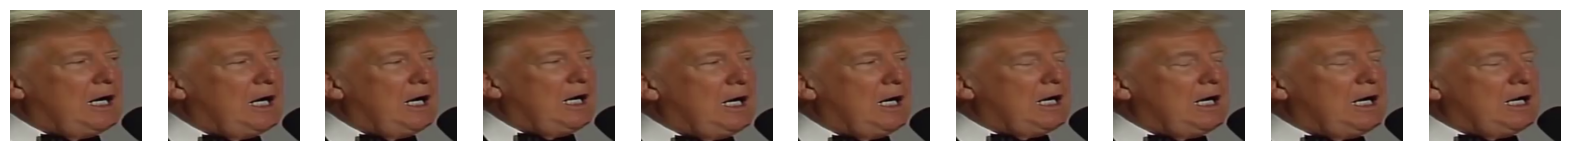

Prediction: Fake
0.579318642616272


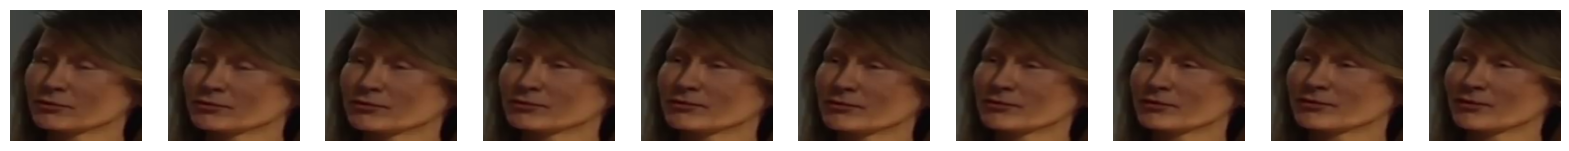

In [21]:
import matplotlib.pyplot as plt


for face_sequence in face_sequences:
    frames = torch.stack([frame for frame in face_sequence])

    frames = frames.unsqueeze(0)  # Shape: (1, num_frames, channels, height, width)

    # Прогнозування
    with torch.no_grad():
        output = model(frames)
        prediction = torch.sigmoid(output).item()
        print("Prediction:", "Fake" if prediction >= 0.5 else "Real")
        print(prediction)

    fig, axes = plt.subplots(1, len(face_sequence), figsize=(20, 5))
    for i, frame in enumerate(face_sequence):
        frame_np = frame.permute(1, 2, 0).numpy()
        axes[i].imshow(frame_np)
        axes[i].axis('off')
    plt.show()

In [73]:
from torchvision import transforms

# Підготуйте перетворення для кадрів
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Стандартна нормалізація для EfficientNet
])

# Завантажте кадри
frames = extract_frames('D:\\deepfake_detection_model\\deepfake_video_detection\\Deepfake_video_of_Volodymyr Zelensky.mp4')
print(len(frames))
# Застосуйте перетворення до кожного кадру
frames = torch.stack([frame for frame in frames])

# Додайте вимір для batch size
frames = frames.unsqueeze(0)  # Shape: (1, num_frames, channels, height, width)

# Прогнозування
with torch.no_grad():
    output = model(frames)
    prediction = torch.sigmoid(output).item()  # Приведення значення до ймовірності
    print("Prediction:", "Fake" if prediction >= 0.5 else "Real")
    print(prediction)


10
Prediction: Fake
0.9534138441085815


100%|██████████| 100/100 [00:56<00:00,  1.78it/s]


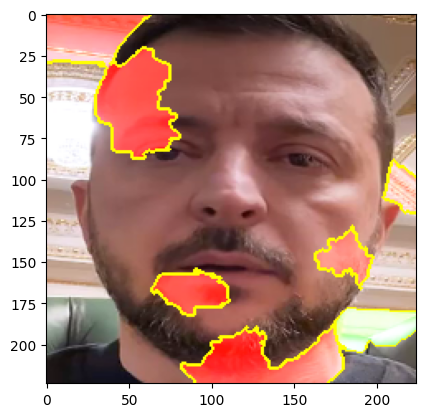

In [ ]:
import torch
import numpy as np
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
from torchvision import transforms

# Обгортка для моделі
class ModelWrapper:
    def __init__(self, model, transform):
        self.model = model
        self.transform = transform

    def predict(self, frames):
        predictions = []
        for frame in frames:
            # Застосовуємо перетворення
            transformed_frame = self.transform(torch.tensor(frame).permute(2, 0, 1).float()).unsqueeze(0)
            transformed_frame = transformed_frame.unsqueeze(0)  # Додаємо вимір для batch

            # Прогноз для окремого кадру
            with torch.no_grad():
                output = self.model(transformed_frame)
                prob = torch.sigmoid(output).item()
            
            predictions.append([prob])  # Додаємо в список результатів

        return np.array(predictions)  # Повертаємо як масив для узгодженості з LIME

# Перетворення для кадрів
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Створення обгортки та пояснювача LIME
wrapped_model = ModelWrapper(model, transform)
explainer = lime_image.LimeImageExplainer()

# Вибір кадру для пояснення
frame_index = 0  # Індекс кадру
frame = frames[0, frame_index].cpu().numpy().transpose(1, 2, 0)  # Переводимо кадр у формат HWC для LIME

# Пояснення обраного кадру
explanation = explainer.explain_instance(frame, wrapped_model.predict, top_labels=1, hide_color=0, num_samples=100)

# Візуалізація
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))
plt.show()

Індекс найважливішого кадру: 1


100%|██████████| 1000/1000 [06:09<00:00,  2.71it/s]


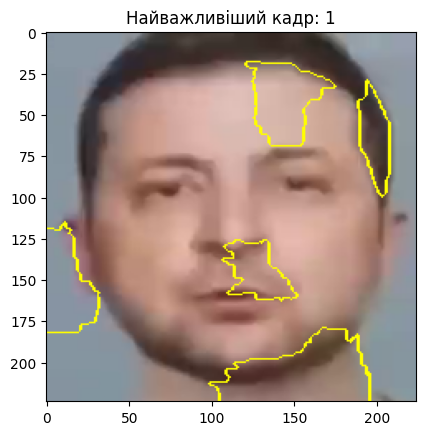

In [75]:
import torch
import torch.nn.functional as F
import numpy as np
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt

# Функція для визначення найважливішого кадру
def get_important_frame(model, frames):
    # Витягнемо ознаки для кожного кадру
    with torch.no_grad():
        vid_features = model.feature_extractor(frames.view(-1, 3, frames.shape[2], frames.shape[3]))
        vid_features = vid_features.view(1, frames.shape[0], -1)  # Shape: (1, num_frames, feature_output_size)
        lstm_out, _ = model.lstm(vid_features)
    
    # Розрахуємо активації по всіх кадрах
    frame_importance = torch.mean(lstm_out, dim=2).squeeze().cpu().numpy()  # (num_frames,)
    important_frame_idx = np.argmax(frame_importance)
    
    return frames[important_frame_idx].unsqueeze(0), important_frame_idx  # Повертаємо кадр і його індекс

# Вибираємо найважливіший кадр
important_frame, important_frame_idx = get_important_frame(model, frames.squeeze(0))
print("Індекс найважливішого кадру:", important_frame_idx)

# Функція передбачення для LIME
def predict_fn(images):
    batch_preds = []
    for image in images:
        # Перетворення кожного кадру
        image = torch.tensor(image).permute(2, 0, 1).unsqueeze(0).float() / 255.0  # нормалізація
        frames = image.unsqueeze(0)  # додати розмір batch
        
        # Витягнення ознак та проходження через модель
        with torch.no_grad():
            features = model.feature_extractor(frames.view(-1, 3, frames.shape[3], frames.shape[4]))
            features = features.view(1, frames.shape[1], -1)
            lstm_out, _ = model.lstm(features)
            lstm_out = torch.mean(lstm_out, dim=1)
            x = torch.relu(model.fc1(lstm_out))
            x = model.fc2(x)
        
        # Ймовірність фейкового класу
        prob_fake = torch.sigmoid(x).item()
        batch_preds.append([1 - prob_fake, prob_fake])  # ймовірності [Real, Fake]

    return np.array(batch_preds)

# Налаштування LIME
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(
    important_frame.squeeze().permute(1, 2, 0).numpy(),  # Перетворюємо кадр у формат HxWxC для LIME
    predict_fn,
    top_labels=2,
    hide_color=0,
    num_samples=1000  # Кількість зразків для пояснення
)

# Отримуємо суперпікселі для найважливіших областей
temp, mask = explanation.get_image_and_mask(
    explanation.top_labels[1],  # Fake клас
    positive_only=True,
    num_features=5,
    hide_rest=False
)

# Візуалізація результатів
plt.imshow(mark_boundaries(temp, mask))
plt.title(f"Найважливіший кадр: {important_frame_idx}")
plt.show()


In [20]:
import torch
from torchvision import models
from models import FaceClassifier
import torch.nn as nn


checkpoint = torch.load("D:\\deepfake_detection_model\\resnext50_32x4d-7cdf4587.pth")

class MyResNeXt(models.resnet.ResNet):
    def __init__(self, training=True):
        super(MyResNeXt, self).__init__(block=models.resnet.Bottleneck,
                                        layers=[3, 4, 6, 3], 
                                        groups=32, 
                                        width_per_group=4)

        self.load_state_dict(checkpoint)

        # Override the existing FC layer with a new one.
        self.fc = nn.Linear(2048, 1)


model = MyResNeXt(training=False)

# Завантажте збережені ваги
model.load_state_dict(torch.load('D:\\deepfake_detection_model\\deepfake_video_detection\\checkpoint.pth'))
model.eval()


MyResNeXt(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
      (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size

In [21]:
import torch
from torchvision import transforms
from facenet_pytorch import MTCNN
import cv2
import numpy as np

mtcnn = MTCNN(device='cpu', post_process=False)

# Ініціалізація трансформацій для передобробки зображень (без ToTensor)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

def classify_video(video_path, model, num_frames=60):
    cap = cv2.VideoCapture(video_path)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frame_indices = np.linspace(0, total_frames - 1, num_frames, dtype=int)

    predictions = []

    for idx in frame_indices:
        cap.set(cv2.CAP_PROP_POS_FRAMES, idx)
        ret, frame = cap.read()
        if not ret:
            continue
        
        # Виявлення обличчя на кадрі
        face = mtcnn(frame)
        if face is None:
            continue

        # Передобробка і передача в модель
        face = transform(face).unsqueeze(0)  # додавання batch dimension
        with torch.no_grad():
            output = model(face)
            prob = torch.sigmoid(output).item()  # отримання ймовірності фейковості
            predictions.append(prob)
    
    cap.release()

    # Усереднення ймовірностей для остаточного результату
    if predictions:
        average_prob = sum(predictions) / len(predictions)
        return "Fake" if average_prob > 0.5 else "Real", average_prob
    else:
        return "No faces detected", None

In [23]:
classify_video('D:\\deepfake_detection_model\\deepfake_video_detection\\Deepfake_video_of_Volodymyr Zelensky.mp4', model=model,)

('Real', 0.0)

In [4]:
import cv2
import itertools
import json
import numpy as np
import pandas as pd
import random
from torch.nn import functional as F
import os.path
import time
import torch
from torch import nn
from torch.nn import functional
import glob
import datetime
import subprocess
from scipy.io import wavfile
from facenet_pytorch import MTCNN
import shutil
from pydub import AudioSegment
import torchvision.transforms.functional as TF
import torchvision.models as models


class CapsuleLayer(nn.Module):
    def __init__(self, input_dim, output_dim, num_capsules, routing_iterations):
        super(CapsuleLayer, self).__init__()
        self.num_capsules = num_capsules
        self.routing_iterations = routing_iterations

        # Ваги для капсульного шару
        self.W = nn.Parameter(torch.randn(num_capsules, input_dim, output_dim))

    def forward(self, x):
        batch_size, num_frames, feature_dim = x.size()
        x = x.view(batch_size, num_frames, 1, feature_dim)  # (batch_size, num_frames, 1, feature_dim)

        # Векторизація для капсул
        u_hat = torch.matmul(x, self.W)  # (batch_size, num_frames, num_capsules, output_dim)
        
        # Ініціалізація ваг для маршрутизації
        b = torch.zeros(batch_size, num_frames, self.num_capsules)
        
        for _ in range(self.routing_iterations):
            c = nn.functional.softmax(b, dim=-1)  # softmax для отримання зважених значень
            s = (c.unsqueeze(-1) * u_hat).sum(dim=1)  # (batch_size, 1, num_capsules, output_dim)

            # Нормалізація капсул
            v = self.squash(s)  # (batch_size, 1, num_capsules, output_dim)
            if _ < self.routing_iterations - 1:
                b += (u_hat * v).sum(dim=-1)  # Оновлення вага для маршрутизації

        return v.squeeze(1)  # Повертаємо векторизацію капсул

    @staticmethod
    def squash(s):
        norm = (s ** 2).sum(dim=-1, keepdim=True)
        return (norm / (1 + norm)) * (s / torch.sqrt(norm))


class FaceClassifierCapsule(nn.Module):
    def __init__(self, n_linear_hidden=256, num_capsules=8, routing_iterations=3):
        super(FaceClassifierCapsule, self).__init__()

        # Завантаження попередньо натренованої EfficientNet
        self.cnn = models.efficientnet_b5(pretrained=True)
        self.feature_extractor = nn.Sequential(*list(self.cnn.children())[:-1])  # Виключаємо шар класифікації

        # Розмір виходу від feature extractor
        self.feature_output_size = 2048  # EfficientNet B7 дає 2560 ознак

        # Капсульний шар
        self.capsule_layer = CapsuleLayer(input_dim=self.feature_output_size, 
                                          output_dim=16, 
                                          num_capsules=num_capsules, 
                                          routing_iterations=routing_iterations)

        # Повнозв'язні шари для класифікації
        self.fc1 = nn.Linear(num_capsules * 16, n_linear_hidden)  # вихід з капсульного шару
        self.fc2 = nn.Linear(n_linear_hidden, 1)

    def forward(self, vid_frames):
        # Витягання ознак для кожного кадру
        batch_size, num_frames, channels, height, width = vid_frames.shape
        vid_frames = vid_frames.view(batch_size * num_frames, channels, height, width)

        # Використовуємо фічерний екстрактор
        with torch.no_grad():
            vid_features = self.feature_extractor(vid_frames)

        # Переформатовуємо ознаки для капсульного шару
        vid_features = vid_features.view(batch_size, num_frames, -1)  # (batch_size, num_frames, feature_output_size)

        # Обробка ознак через капсульний шар
        capsule_output = self.capsule_layer(vid_features)  # (batch_size, num_capsules, output_dim)

        # Згладжуємо вихід капсульного шару для повнозв'язних шарів
        capsule_output = capsule_output.view(batch_size, -1)  # (batch_size, num_capsules * output_dim)

        # Класифікаційні шари
        x = torch.relu(self.fc1(capsule_output))
        x = self.fc2(x)

        return x


class FaceClassifierCNN(nn.Module):
    def __init__(self, n_linear_hidden=256):
        super(FaceClassifierCNN, self).__init__()
        
        # Завантаження попередньо натренованої EfficientNet
        self.cnn = models.efficientnet_b7(pretrained=True)
        self.feature_extractor = nn.Sequential(*list(self.cnn.children())[:-1])  # Виключаємо шар класифікації
        
        # Розмір виходу від feature extractor
        self.feature_output_size = 2560  # Для EfficientNet B5
        
        # Повнозв'язні шари для класифікації
        self.fc1 = nn.Linear(self.feature_output_size, n_linear_hidden)
        self.fc2 = nn.Linear(n_linear_hidden, 1)
        
    def forward(self, vid_frames):
        # Витягуємо ознаки для кожного кадру
        batch_size, num_frames, channels, height, width = vid_frames.shape
        vid_frames = vid_frames.view(batch_size * num_frames, channels, height, width)
        
        # Використовуємо фічерний екстрактор
        with torch.no_grad():
            vid_features = self.feature_extractor(vid_frames)  # (batch_size * num_frames, feature_output_size, 1, 1)
        
        # Переформатовуємо результат в (batch_size, num_frames, feature_output_size)
        vid_features = vid_features.view(batch_size, num_frames, -1)
        
        # Усереднюємо ознаки по всіх кадрах
        vid_features = vid_features.mean(dim=1)  # (batch_size, feature_output_size)
        
        # Класифікаційні шари
        x = torch.relu(self.fc1(vid_features))
        x = self.fc2(x)
        
        return x

class FaceDeepfakeDataset(torch.utils.data.Dataset):
    def __init__(self, folders, n_frames=None, n_audio_reads=50027, train=True, device=None, cache_folder=None):
        """n_audio_reads controls the length of the audio sequence: 5000 readings/sec."""
        self.n_frames = n_frames
        self.n_audio_reads = n_audio_reads
        self.videos = []
        self.train = train
        self.device = device if device is not None else torch.device("cpu")
        self.cache_folder = cache_folder
        self.detector = MTCNN(device='cpu', post_process=False)
        for i in range(len(folders)):
            if train:
                #print(folders[i])
                for item in os.listdir(folders[i]):
                    item_path = os.path.join(folders[i], item)
                    if str(os.path.basename(item_path)) == 'fake':
                        for curr in os.listdir(item_path):
                            if os.path.isfile(os.path.join(item_path, curr)):
                                metadata = {}
                                metadata['label']='fake'
                                self.videos += [(os.path.join(item_path, curr), metadata)]
                    else:
                        for item_file in os.listdir(item_path):
                            if os.path.isfile(os.path.join(item_path, item_file)):
                                metadata = {}
                                metadata['label']='real'
                                self.videos += [(os.path.join(item_path, item_file), metadata)]
            else:
                self.videos += glob.glob(folders[i] + "/*.mp4")

    def __process_frame(self, frame):
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        boxes, _ = self.detector.detect(frame, landmarks=False)  # Отримуємо координати обличчя
        
        if boxes is None:
            # Повертаємо порожній кадр, якщо обличчя не знайдено
            face = torch.zeros((3, 300, 300))
        else:
            # Беремо перше обличчя (якщо знайдено кілька)
            box = boxes[0]
            
            # Розширюємо рамку на 30%
            width = box[2] - box[0]
            height = box[3] - box[1]
            expand_x = width * 0.3 / 2
            expand_y = height * 0.3 / 2
            x1 = max(int(box[0] - expand_x), 0)
            y1 = max(int(box[1] - expand_y), 0)
            x2 = min(int(box[2] + expand_x), frame.shape[1])
            y2 = min(int(box[3] + expand_y), frame.shape[0])
            
            # Обрізаємо зображення за новими координатами
            face = frame[y1:y2, x1:x2]
            face = cv2.resize(face, (300, 300))  # Масштабуємо до 300x300
            
            # Перетворюємо на тензор і нормалізуємо
            face = torch.from_numpy(face).permute(2, 0, 1).float() / 255.0
        
        return face

    def __getitem__(self, n):
        if self.train:
            video, metadata = self.videos[n]
        else:
            video = self.videos[n]

        # Processing video frames
        if os.path.islink(video):
            video = os.readlink(video)

        cap = cv2.VideoCapture(video)

        frames = []
        for _ in range(self.n_frames):
            ret, frame = cap.read()
            if not ret:
                break
            frames.append(self.__process_frame(frame))
        '''total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        step = max(1, total_frames // self.n_frames)

        for i in range(self.n_frames):
            cap.set(cv2.CAP_PROP_POS_FRAMES, i * step)
            ret, frame = cap.read()
            if ret:
                frames.append(self.__process_frame(frame))
            else:
                break'''
        cap.release()
        frames = torch.stack(frames).to(self.device)
        
        # Return data
        if self.train:
            label = 0.0
            if metadata['label'] == 'fake':
                label = 1.0
            return frames, torch.FloatTensor([label]).to(self.device)
        else:
            return frames

    def __len__(self):
        return len(self.videos)


'''def __process_frame(self, frame):
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    boxes, _ = self.detector.detect(frame, landmarks=False)  # Отримуємо координати обличчя
    
    if boxes is None:
        # Повертаємо None, якщо обличчя не знайдено
        return None
    else:
        # Беремо перше обличчя (якщо знайдено кілька)
        box = boxes[0]
        
        # Розширюємо рамку на 30%
        width = box[2] - box[0]
        height = box[3] - box[1]
        expand_x = width * 0.3 / 2
        expand_y = height * 0.3 / 2
        x1 = max(int(box[0] - expand_x), 0)
        y1 = max(int(box[1] - expand_y), 0)
        x2 = min(int(box[2] + expand_x), frame.shape[1])
        y2 = min(int(box[3] + expand_y), frame.shape[0])
        
        # Обрізаємо зображення за новими координатами
        face = frame[y1:y2, x1:x2]
        face = cv2.resize(face, (300, 300))  # Масштабуємо до 300x300
        
        # Перетворюємо на тензор і нормалізуємо
        face = torch.from_numpy(face).permute(2, 0, 1).float() / 255.0
        
        return face

def __getitem__(self, n):
    if self.train:
        video, metadata = self.videos[n]
    else:
        video = self.videos[n]

    # Processing video frames
    if os.path.islink(video):
        video = os.readlink(video)

    cap = cv2.VideoCapture(video)
    
    frames = []
    while len(frames) < self.n_frames:
        ret, frame = cap.read()
        if not ret:
            # Якщо дійшли до кінця відео, повертаємось на початок
            cap.set(cv2.CAP_PROP_POS_FRAMES, 0)
            continue
        
        processed_frame = self.__process_frame(frame)
        if processed_frame is not None:
            frames.append(processed_frame)

    cap.release()
    frames = torch.stack(frames).to(self.device)
    
    # Return data
    if self.train:
        label = 0.0
        if metadata['label'] == 'fake':
            label = 1.0
        return frames, torch.FloatTensor([label]).to(self.device)
    else:
        return frames

def __len__(self):
    return len(self.videos)'''


In [6]:
def test_face_dataset():
    TRAIN_FOLDERS = [os.path.join("D:\\", "deepfake_detection_model", "archive_uadfv", "fake_videos", "test")]
    # TRAIN_FOLDERS = [
    #     f'train/dfdc_train_part_{i}' for i in range(1)
    # ]
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    dataset = FaceDeepfakeDataset(TRAIN_FOLDERS,n_frames=30, train=True, device=device, cache_folder=None)
    for i, batch in enumerate(dataset):
        frames, label = batch
        print(label)
        if(frames.size() != torch.Size([30,3,160,160])):
            print(frames.size())
        #break


test_face_dataset()

tensor([1.], device='cuda:0')


In [5]:
import time
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import random
import datetime
import sys
import pandas as pd
import os
from models import PositionalEncoding
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import torchvision
from models import FaceClassifier

base_path = 'deepfake-detection-challenge'
        
#train_folder = os.listdir(str(sys.argv[1]))
train_folders = [os.path.join("D:\\", "deepfake_detection_model", "archive_uadfv", "fake_videos", "train")]


#test_folder = os.listdir(str(sys.argv[2]))
test_folders = [os.path.join("D:\\", "deepfake_detection_model", "archive_uadfv", "fake_videos", "test")]

batch_size = int(1)
num_epochs = int(10)
n_frames = int(30)
lr = float(0.001)

TRAIN_FOLDERS = train_folders
TEST_FOLDERS = test_folders
print(f"all train folders: {train_folders}, {type(train_folders)}")
print(f"all test folders: {test_folders}, {type(test_folders)}")
# AUTOENCODER = 'autoencoder_H10M46S22_04-11-21.pt'

# batch_size = 10
# num_epochs = 1
# epoch_size = 500
# n_frames = 30
milestones = [6,12,18]
gamma = 0.1
n_vid_features = 36*36 # 3600
n_aud_features = 1
n_head = 8
n_layers = 6

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#autoencoder = FaceAutoencoder()
#if len(sys.argv) > 7:
#    print("pretrained autoencoder is loaded")
#    AUTOENCODER = str(sys.argv[7])
#    autoencoder.load_state_dict(torch.load(AUTOENCODER, map_location=device))
#autoencoder.to(device)
#autoencoder.eval()

model = FaceClassifier()
model = model.to(device)
class_weights = {0: 0.6191950464396285, 1: 2.5974025974025974}
weights_tensor = torch.tensor([class_weights[0], class_weights[1]], dtype=torch.float32).to(device)

# Modify the loss function
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)
scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones=milestones, gamma=gamma)

start_time = datetime.datetime.now()
print(f'start time: {str(start_time)}')
print(f'using device: {device}')

'''Splitting into Train and Validation'''
train_dataset = FaceDeepfakeDataset(TRAIN_FOLDERS,  n_frames=n_frames, n_audio_reads=576, device=device, cache_folder="face_encode_cache")
test_dataset = FaceDeepfakeDataset(TEST_FOLDERS, n_frames=n_frames, n_audio_reads=576, device=device)
# dataset_size = len(dataset)
# val_split = .3
# val_size = int(val_split * dataset_size)
# train_size = dataset_size - val_size
# train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True)
print(len(train_loader))
# dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

'''Train_Loop'''
train_losses = []
val_losses = []
best_loss = np.inf
train_accuracies = []
val_accuracies = []
epoch_times = []


for epoch in range(num_epochs):
    epoch_start_time = time.time()
    epoch_t_loss = 0
    epoch_v_loss = 0
    t_count = 0
    t_count_wrong = 0
    train_labels_all = []
    train_preds_all = []

    model.train()
    torch.cuda.empty_cache()
    for i, batch in tqdm(enumerate(train_loader)):
        # if i * batch_size >= epoch_size:
        #     break
        video_data, labels = batch
        video_data = video_data.to(device)
        #audio_data = audio_data.to(device)
        
        output = model(video_data)
        loss = criterion(output, labels)

        output = torch.sigmoid(output)
        output = output.round()
        
        n_wrong = (labels - output).abs().sum()
        t_count_wrong += n_wrong
        t_count += labels.shape[0]

        epoch_t_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_labels_all.extend(labels.cpu().detach().numpy())
        train_preds_all.extend(output.cpu().detach().numpy())

        #print('.', end='', flush=True)
        torch.cuda.empty_cache()

    # Перетворіть на numpy-масиви
    train_labels_all = np.array(train_labels_all).astype(int)
    train_preds_all = np.array(train_preds_all).astype(int)

    # Обчисліть та виведіть матрицю плутанини для тренувального набору
    conf_matrix_train = confusion_matrix(train_labels_all, train_preds_all)
    print(conf_matrix_train)
    # plt.figure(figsize=(8, 6))
    #sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
    #plt.xlabel('Predicted Label')
    #plt.ylabel('True Label')
    #plt.title('Confusion Matrix (Train Set)')
    #plt.show()

    # Виведіть класифікаційний звіт для тренувального набору
    print("Classification Report (Train Set):")
    print(classification_report(train_labels_all, train_preds_all, target_names=['Real', 'Fake']))

    all_labels = []
    all_preds = []

    model.eval()
    with torch.no_grad():
        v_count = 0
        v_count_wrong = 0
        for i, batch in enumerate(val_loader):
            # if i * batch_size >= epoch_size:
        #        break
            video_data, labels = batch
            video_data = video_data.to(device)
            #audio_data = audio_data.to(device)
            # optimizer.zero_grad()
            output = model(video_data)
            loss = criterion(output, labels)

            output = torch.sigmoid(output)
            output = output.round()
            n_wrong = (labels - output).abs().sum()
            v_count_wrong += n_wrong
            v_count += labels.shape[0]

            epoch_v_loss += loss.item()

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(output.cpu().numpy())

            # loss.backward()
            # optimizer.step()
            print('.', end='', flush=True)

    epoch_end_time = time.time()
    epoch_exec_time = epoch_end_time - epoch_start_time
    epoch_times.append(epoch_exec_time)
    train_losses.append(epoch_t_loss/len(train_loader))
    val_losses.append(epoch_t_loss/len(val_loader))

    t_count_right = t_count - t_count_wrong
    v_count_right = v_count - v_count_wrong
    t_accuracy = t_count_right / t_count
    v_accuracy = v_count_right / v_count

    train_accuracies.append(t_accuracy)
    val_accuracies.append(v_accuracy)

    print(f'\nepoch: {epoch}, train loss: {train_losses[-1]}, val loss: {val_losses[-1]}, executed in: {str(epoch_exec_time)}')
    print(f"train total: {t_count}, train correct: {t_count_right}, train incorrect: {t_count_wrong}, train accuracy: {t_accuracy}")
    print(f"valid total: {v_count}, valid correct: {v_count_right}, valid incorrect: {v_count_wrong}, valid accuracy: {v_accuracy}")
    all_labels = np.array(all_labels).astype(int)
    all_preds = np.array(all_preds).astype(int)
    # Обчислення та візуалізація матриці плутанини
    conf_matrix = confusion_matrix(all_labels, all_preds)
    #print(conf_matrix)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

    # Друк звіту про класифікацію
    print("Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=['Real', 'Fake']))

    scheduler.step()
    ### Saving model per best validation loss 
    if best_loss > val_losses[-1]: 
        best_loss = val_losses[-1]
        end_time = datetime.datetime.now()
        torch.save(model.state_dict(), f'classifier_{n_frames}_small.pt')

        
end_time = datetime.datetime.now()
print(f"end time: {str(end_time)}")
exec_time = end_time - start_time
print(f"executed in: {str(exec_time)}")
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_cached(0)/1024**3,1), 'GB')

#df = pd.DataFrame()
#df['train_loss'] = train_losses.cpu().numpy()
#df['val_loss'] = val_losses.cpu().numpy()
#df['train_acc'] = train_accuracies.cpu().numpy()
#df['val_acc'] = val_accuracies.cpu().numpy()
#df['epoch_times'] = epoch_times
    
#df.to_csv(f'train_classifier_nframes{n_frames}_bs{batch_size}_lr{lr}.csv', index=False)


all train folders: ['D:\\deepfake_detection_model\\archive_uadfv\\fake_videos\\train'], <class 'list'>
all test folders: ['D:\\deepfake_detection_model\\archive_uadfv\\fake_videos\\test'], <class 'list'>
start time: 2024-11-06 00:05:58.492005
using device: cuda
82


16it [00:46,  2.89s/it]


KeyboardInterrupt: 

In [16]:
print(f'\nepoch: {epoch}, train loss: {train_losses[-1]}, val loss: {val_losses[-1]}, executed in: {str(epoch_exec_time)}')
print(f"train total: {t_count}, train correct: {t_count_right}, train incorrect: {t_count_wrong}, train accuracy: {t_accuracy}")
print(f"valid total: {v_count}, valid correct: {v_count_right}, valid incorrect: {v_count_wrong}, valid accuracy: {v_accuracy}")


epoch: 9, train loss: 0.09363704160276073, val loss: 1.27970623523773, executed in: 255.10013222694397
train total: 82, train correct: 79.0, train incorrect: 3.0, train accuracy: 0.9634146094322205
valid total: 6, valid correct: 4.0, valid incorrect: 2.0, valid accuracy: 0.6666666865348816


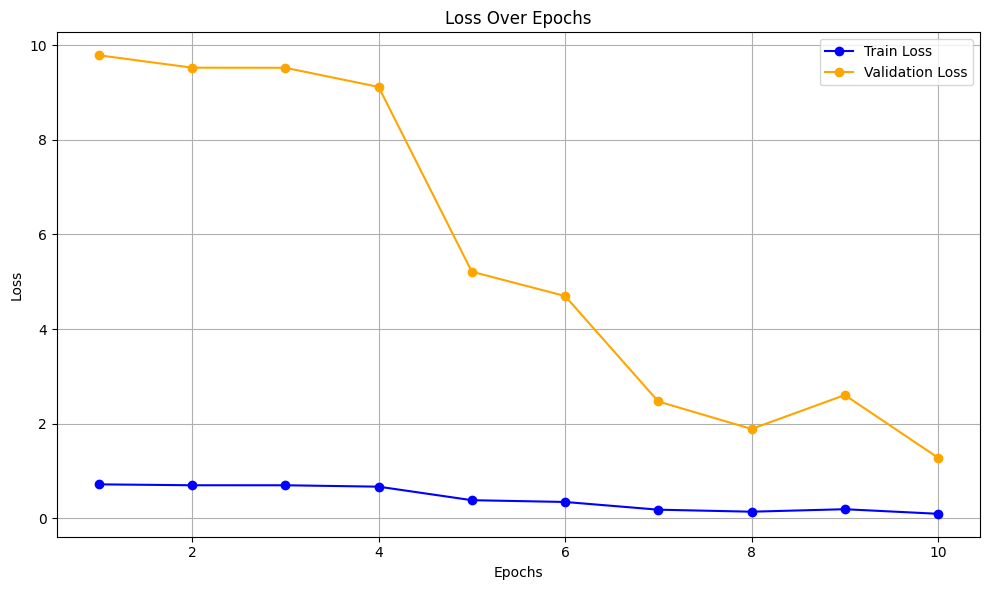

In [17]:
# Відображення значень
epochs = range(1, 10 + 1)

# Графік втрат
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_losses, label='Train Loss', color='blue', marker='o')
plt.plot(epochs, val_losses, label='Validation Loss', color='orange', marker='o')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.tight_layout()

# Показати графік
plt.show()

In [18]:
torch.save(model.state_dict(), 'best_uadfv_3.pt')